In [75]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')



In [76]:
baseball=pd.read_csv('baseball.csv')

In [77]:
baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [78]:
baseball.shape

(30, 17)

In [79]:
baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [80]:
baseball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [81]:
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

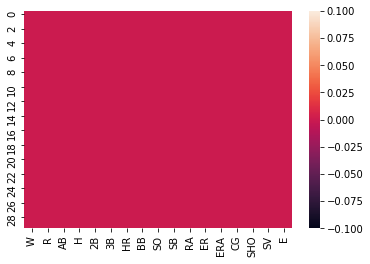

In [82]:
sns.heatmap(baseball.isnull())

In [83]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [84]:
collist=baseball.columns
collist

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

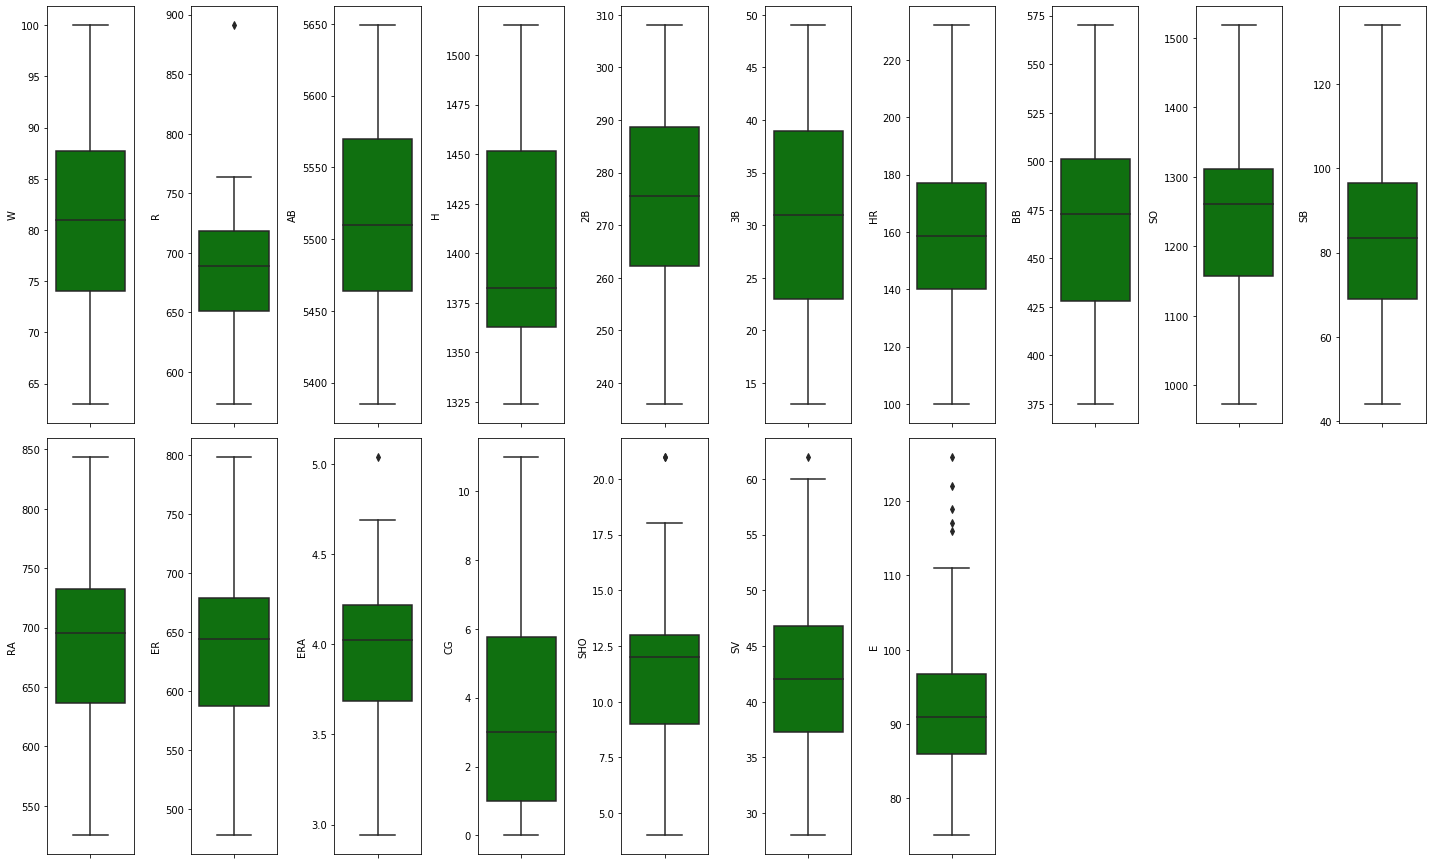

In [85]:
plt.figure(figsize=(20,60))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.boxplot(baseball[collist[i]],color='green',orient='v')
    plt.tight_layout()


In [86]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(baseball))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [87]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [88]:
z[5][1]

3.5096470447193067

In [89]:
baseball_new=baseball[(z<3).all(axis=1)]

In [90]:
baseball_new.shape

(29, 17)

In [91]:
baseball.shape

(30, 17)

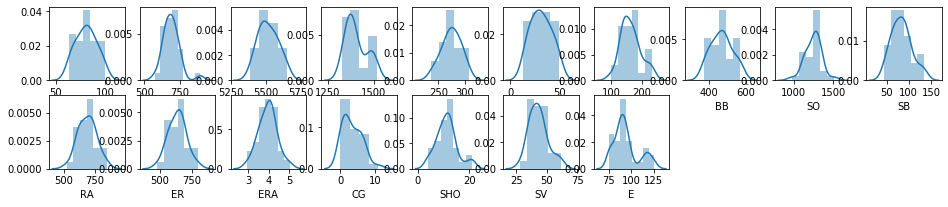

In [92]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(baseball[collist[i]])         #data is not skewed

In [93]:
corr=baseball_new.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


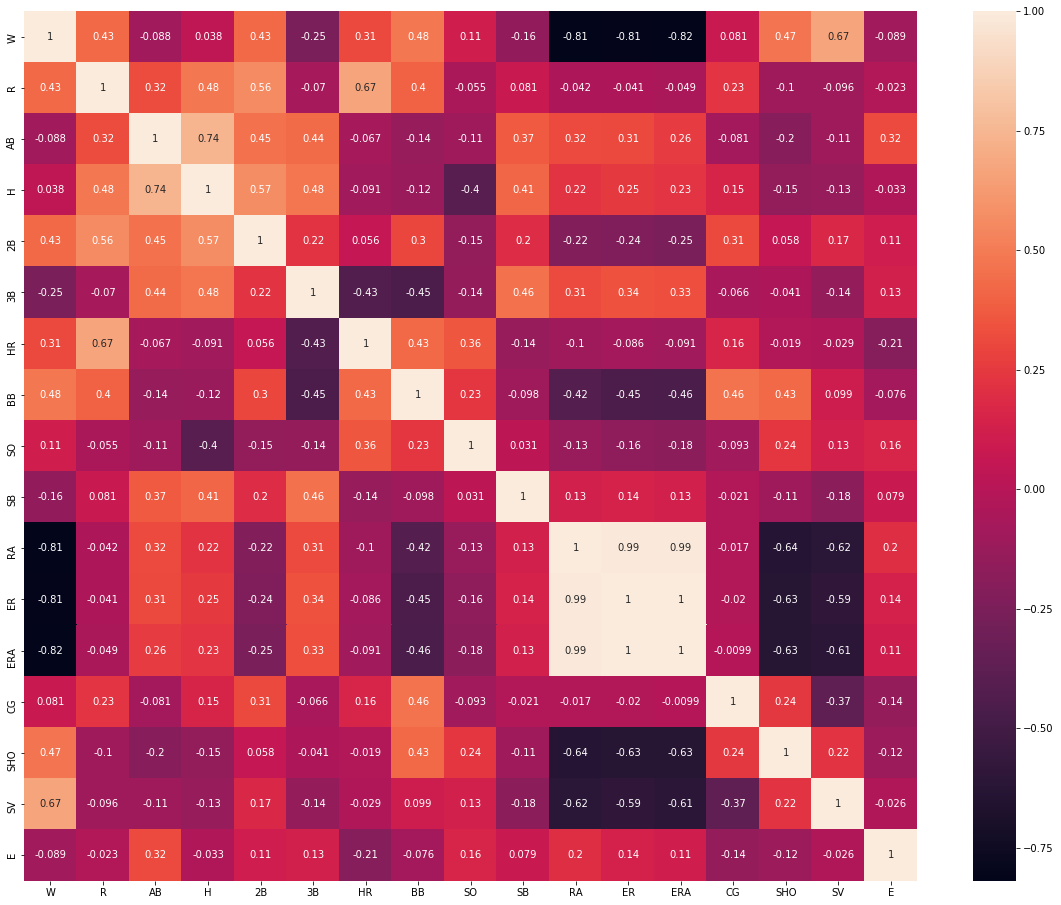

In [94]:
corr_hmap=baseball.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()


In [95]:
baseball_new.shape

(29, 17)

In [96]:
x=baseball_new.iloc[ : , 1:]

In [97]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [98]:
x.shape

(29, 16)

In [99]:
y=baseball_new.iloc[ : , 0:1]

In [100]:
y

,W
0,95
1,83
2,81
3,76
4,74
6,87
7,81
8,80
9,78
10,88


In [101]:
y.shape

(29, 1)

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)

In [103]:
x_train.shape

(19, 16)

In [104]:
y_train.shape

(19, 1)

In [105]:
x_test.shape

(10, 16)

In [106]:
y_test.shape

(10, 1)

In [107]:
lm=LinearRegression()

In [108]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
lm.coef_

array([[ 5.67192910e-02, -5.91978420e-02,  2.96878773e-02,
        -4.03123688e-03,  4.70269689e-01,  2.52641411e-01,
        -4.80334861e-02, -4.37145315e-02, -1.34801670e-02,
         3.05676719e-01,  2.19173802e-01, -1.06217799e+02,
         1.96025336e-01,  9.13627423e-01, -1.02201081e-01,
         1.54579811e-01]])

In [110]:
lm.intercept_

array([400.19068078])

In [111]:
lm.score(x_train,y_train)

0.992208327658185

In [112]:
pred=lm.predict(x_test)
print("predicted wins: ",pred)
print("actual wins : ",y_test)

predicted wins:  [[81.83878586]
 [80.89715787]
 [99.62552199]
 [62.16820238]
 [77.66366534]
 [82.36501199]
 [49.03180744]
 [99.31925951]
 [94.30290747]
 [57.25495183]]
actual wins :       W
27  79
8   80
25  92
29  68
6   87
10  88
23  67
11  86
14  68
24  63


In [113]:
print('error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error:  ',mean_squared_error(y_test,pred))
print('Root mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error:  9.54999937288016
Mean squared error:   144.50494190632588
Root mean squared error:  12.021020834618243


In [114]:
from sklearn.metrics import r2_score
print("r2score: ",r2_score(pred,y_test))


r2score:  0.47422510386803585


In [115]:
from sklearn.model_selection import cross_val_score,cross_val_predict
lmc=LinearRegression()
lmscore=cross_val_score(lmc,x,y,cv=8)
print(lmscore)
print(lmscore.mean())
pred=cross_val_predict(lmc,x,y,cv=8)
pred

[ 0.9656621  -1.07523528  0.17796388  0.43590842  0.73256493  0.67340135
  0.88424953 -0.93164766]
0.23285840924752954


array([[92.65621783],
       [83.65497029],
       [81.85996723],
       [75.84043626],
       [67.19082362],
       [84.52819407],
       [80.82856885],
       [91.13062903],
       [80.70074856],
       [84.48404962],
       [82.15835425],
       [81.50194944],
       [78.33077404],
       [87.49435056],
       [96.08785557],
       [92.55621529],
       [85.90535127],
       [74.03223297],
       [60.74177159],
       [83.609046  ],
       [89.42422571],
       [69.5736199 ],
       [68.40822934],
       [57.13508839],
       [91.56974791],
       [88.16546209],
       [85.64839412],
       [81.99897349],
       [64.99968281]])

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,random_state=45)
rf.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

In [117]:
rf.score(x_train,y_train)

0.935026150627615

In [118]:
pred=rf.predict(x_test)

In [119]:
pred

array([76. , 92.9, 85.3, 73.1, 86.8, 72.7, 73.1, 83.5, 75.9, 67.6])

In [ ]:
# LinearRegression model has more score when compared with others models.  it has a score of 0.99. 

In [125]:

print(lmscore.mean())
print(rf.score(x_train,y_train))
print(lm.score(x_train,y_train))

0.23285840924752954
0.935026150627615
0.992208327658185


In [126]:
# saving the model

In [127]:
from sklearn.externals import joblib
joblib.dump(lm,'lmfile.obj')


['lmfile.obj']

In [128]:
lm=joblib.load('lmfile.obj')

In [129]:
predict=lm.predict(x_test)

In [130]:
predict

array([[81.83878586],
       [80.89715787],
       [99.62552199],
       [62.16820238],
       [77.66366534],
       [82.36501199],
       [49.03180744],
       [99.31925951],
       [94.30290747],
       [57.25495183]])